11/09/2024

Esdras Lara Magaña, 752312

# T04-Programación lineal 

In [9]:
import numpy as np
import scipy.optimize as opt

### 02 Programación lineal

4. Problema de transporte 1

Una empresa tiene dos fábricas A y B. En ellas se fabrica un determinado producto, a razón de 500 y 400 unidades por día respectivamente. El producto ha de ser distribuido posteriormente a tres centros C, D y E, que requieren, respectivamente, 200, 300 y 400 unidades. Los costos de transportar cada unidad del producto desde cada fábrica a cada centro distribuidor son los indicados en la tabla siguiente:

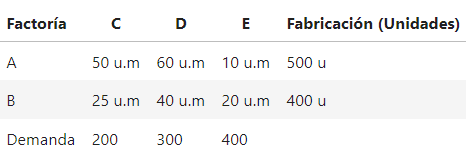

¿De qué manera deben organizar el transporte a fin de que los gastos sean mínimos?

Resolver con linprog

1. Criterio

Minimizar el costo total de transporte.

2. Variables de Control
- x_{AC}: Unidades transportadas desde la fábrica A al centro C.
- x_{AD}: Unidades transportadas desde la fábrica A al centro D.
- x_{AE}: Unidades transportadas desde la fábrica A al centro E.
- x_{BC}: Unidades transportadas desde la fábrica B al centro C.
- x_{BD}: Unidades transportadas desde la fábrica B al centro D.
- x_{BE}: Unidades transportadas desde la fábrica B al centro E.

3. Función de Costo

\[ C = 8x_{AC} + 6x_{AD} + 7x_{AE} + 9x_{BC} + 5x_{BD} + 6x_{BE} \]

4. Información Adicional

 Disponibilidad en fábricas:
   - Fábrica A: \( x_{AC} + x_{AD} + x_{AE} \leq 500 \)
   - Fábrica B: \( x_{BC} + x_{BD} + x_{BE} \leq 400 \)

 Demanda en centros:
   - Centro C: \( x_{AC} + x_{BC} = 200 \)
   - Centro D: \( x_{AD} + x_{BD} = 300 \)
   - Centro E: \( x_{AE} + x_{BE} = 400 \)

5. Problema de Optimización

  C = 8x_{AC} + 6x_{AD} + 7x_{AE} + 9x_{BC} + 5x_{BD} + 6x_{BE}

- Restricciones:

  \[ x_{AC} + x_{AD} + x_{AE} \leq 500 \]
  
  \[ x_{BC} + x_{BD} + x_{BE} \leq 400 \]
  
  \[ x_{AC} + x_{BC} = 200 \]
  
  \[ x_{AD} + x_{BD} = 300 \]
  
  \[ x_{AE} + x_{BE} = 400 \]


In [14]:
c = [8, 6, 7, 9, 5, 6]

A_eq = [
    [1, 0, 0, 1, 0, 0],  
    [0, 1, 0, 0, 1, 0],  
    [0, 0, 1, 0, 0, 1],  
    [1, 1, 1, 0, 0, 0],  
    [0, 0, 0, 1, 1, 1],  
]

b_eq = [200, 300, 400, 500, 400]

opt.linprog(c, A_eq, b_eq)


       message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
       success: True
        status: 0
           fun: 0.0
             x: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
                  0.000e+00]
           nit: 0
         lower:  residual: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                             0.000e+00  0.000e+00]
                marginals: [ 8.000e+00  6.000e+00  7.000e+00  9.000e+00
                             5.000e+00  6.000e+00]
         upper:  residual: [       inf        inf        inf        inf
                                   inf        inf]
                marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                             0.000e+00  0.000e+00]
         eqlin:  residual: []
                marginals: []
       ineqlin:  residual: [ 2.000e+02  3.000e+02  4.000e+02  5.000e+02
                             4.000e+02]
                marginals: [-0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00
      

### A05

Ejercicio 1

Se quiere producir comida para gatos de la manera más barata, no obstante se debe también asegurar que se cumplan los datos requeridos de analisis nutricional. Por lo que se quiere variar la cantidad de cada ingrediente para cumplir con los estandares nutricionales. Los requisitos que se tienen es que en 100 gramos, se deben tener por lo menos 9 gramos de proteína y  7 gramos de grasa. Así mismo, no se debe tener más de 2.5 gramos de fibra y 0.5 gramos  sal.

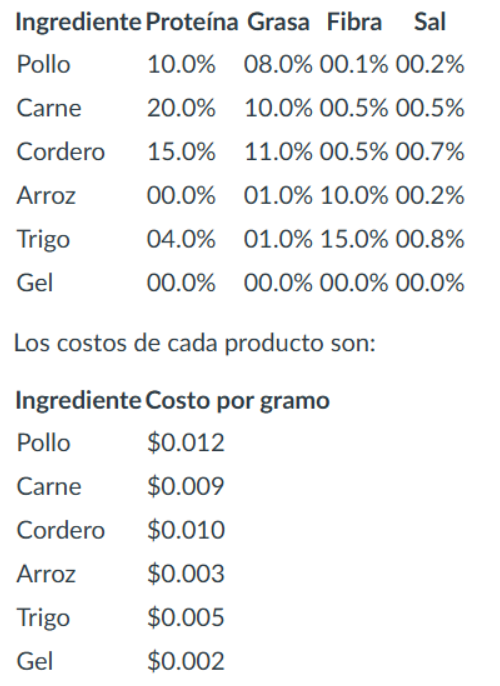

Lo que se busca optimizar en este caso es la cantidad de productos que se debe utilizar en la comida de gato, minimizando el costo total.

1. Identificar criterio
    * Minimizar el costo total de la comida para gatos.

2. Variables de control

    * \( p \) = cantidad de pollo en la mezcla (en gramos)
    * \( c \) = cantidad de carne en la mezcla (en gramos)
    * \( l \) = cantidad de cordero en la mezcla (en gramos)
    * \( a \) = cantidad de arroz en la mezcla (en gramos)
    * \( t \) = cantidad de trigo en la mezcla (en gramos)
    * \( g \) = cantidad de gel en la mezcla (en gramos)

3. Función de costo

La función de costo total es:
 C = 0.012p + 0.009c + 0.010l + 0.003a + 0.005t + 0.002g 

4. Información adicional

- El total de la mezcla debe sumar 100 gramos:
  \[ p + c + l + a + t + g = 100 \]

- Contenido de proteína (debe ser al menos 9 gramos):
  \[ 0.10p + 0.20c + 0.15l + 0.00a + 0.04t + 0.00g \geq 9 \]

- Contenido de grasa (debe ser al menos 7 gramos):
  \[ 0.08p + 0.10c + 0.11l + 0.01a + 0.01t + 0.00g \geq 7 \]

- Contenido de fibra (no debe exceder los 2.5 gramos):
  \[ 0.00p + 0.00c + 0.00l + 0.10a + 0.15t + 0.00g \leq 2.5 \]

- Contenido de sal (no debe exceder los 0.5 gramos):
  \[ 0.002p + 0.005c + 0.007l + 0.002a + 0.008t + 0.000g \leq 0.5 \]

Problema de Optimización

Minimizar el costo total:
 C = 0.012p + 0.009c + 0.010l + 0.003a + 0.005t + 0.002g 

Restricciones:
\[
\begin{align*}
1. & \quad p + c + l + a + t + g = 100 \\
2. & \quad 0.10p + 0.20c + 0.15l + 0.00a + 0.04t + 0.00g \geq 9 \\
3. & \quad 0.08p + 0.10c + 0.11l + 0.01a + 0.01t + 0.00g \geq 7 \\
4. & \quad 0.00p + 0.00c + 0.00l + 0.10a + 0.15t + 0.00g \leq 2.5 \\
5. & \quad 0.002p + 0.005c + 0.007l + 0.002a + 0.008t + 0.000g \leq 0.5 \\
6. & \quad p, c, l, a, t, g \geq 0
\end{align*}



In [38]:
c = [0.012, 0.009, 0.010, 0.003, 0.005, 0.002] 

A_ub = [
    [-0.10, -0.20, -0.15, 0, -0.04, 0],  
    [-0.08, -0.10, -0.11, -0.01, -0.01, 0],  
    [0, 0, 0, 0.10, 0.15, 0],  
    [0.002, 0.005, 0.007, 0.002, 0.008, 0]   
]

b_ub = [9, 7, 2.5, 0.5]

opt.linprog(c, A_ub, b_ub)


       message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
       success: True
        status: 0
           fun: 0.0
             x: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
                  0.000e+00]
           nit: 0
         lower:  residual: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                             0.000e+00  0.000e+00]
                marginals: [ 1.200e-02  9.000e-03  1.000e-02  3.000e-03
                             5.000e-03  2.000e-03]
         upper:  residual: [       inf        inf        inf        inf
                                   inf        inf]
                marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                             0.000e+00  0.000e+00]
         eqlin:  residual: []
                marginals: []
       ineqlin:  residual: [ 9.000e+00  7.000e+00  2.500e+00  5.000e-01]
                marginals: [-0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00]

Ejercicio 2

La Comisión Federal de Electricidad (CFE) dispone de cuatro plantas de generación para satisfacer la demanda diaria eléctrica en cuatro ciudades, Guadalajara, León y Morelia. Las plantas 1, 2 y 3 pueden satisfacer 75, 50 y 60 millones de kW al día respectivamente. Las necesidades de las ciudades de Guadalajara, León y Morelia son de 60, 45 y 60 millones de Kw al día respectivamente.

Los costos asociados al envío de suministro energético por cada millón de kW entre cada planta y cada ciudad son los registrados en la siguiente tabla.

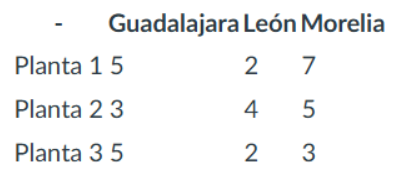

1. Identificar criterio

* Minimizar el costo total del suministro de energía.

2. Variables de control

* \( x_{11} \) = cantidad de energía enviada de la Planta 1 a Guadalajara (en millones de kW)
* \( x_{12} \) = cantidad de energía enviada de la Planta 1 a León (en millones de kW)
* \( x_{13} \) = cantidad de energía enviada de la Planta 1 a Morelia (en millones de kW)
* \( x_{21} \) = cantidad de energía enviada de la Planta 2 a Guadalajara (en millones de kW)
* \( x_{22} \) = cantidad de energía enviada de la Planta 2 a León (en millones de kW)
* \( x_{23} \) = cantidad de energía enviada de la Planta 2 a Morelia (en millones de kW)
* \( x_{31} \) = cantidad de energía enviada de la Planta 3 a Guadalajara (en millones de kW)
* \( x_{32} \) = cantidad de energía enviada de la Planta 3 a León (en millones de kW)
* \( x_{33} \) = cantidad de energía enviada de la Planta 3 a Morelia (en millones de kW)

3. Función de costo

La función de costo total es:
C = 5x_{11} + 2x_{12} + 7x_{13} + 3x_{21} + 4x_{22} + 5x_{23} + 5x_{31} + 2x_{32} + 3x_{33} 

4. Información adicional

* Capacidad de las plantas:
  \[
  \begin{align}
  1. & \quad x_{11} + x_{12} + x_{13} \leq 75 \\
  2. & \quad x_{21} + x_{22} + x_{23} \leq 50 \\
  3. & \quad x_{31} + x_{32} + x_{33} \leq 60
  \end{align}
  \]

* Demanda de las ciudades:
  \[
  \begin{align*}
  4. & \quad x_{11} + x_{21} + x_{31} \geq 60 \\
  5. & \quad x_{12} + x_{22} + x_{32} \geq 45 \\
  6. & \quad x_{13} + x_{23} + x_{33} \geq 60
  \end{align*}
  \]

Problema de Optimización

Minimizar el costo total:
C = 5x_{11} + 2x_{12} + 7x_{13} + 3x_{21} + 4x_{22} + 5x_{23} + 5x_{31} + 2x_{32} + 3x_{33} \]

Restricciones:
\[
\begin{align*}
1. & \quad x_{11} + x_{12} + x_{13} \leq 75 \\
2. & \quad x_{21} + x_{22} + x_{23} \leq 50 \\
3. & \quad x_{31} + x_{32} + x_{33} \leq 60 \\
4. & \quad x_{11} + x_{21} + x_{31} \geq 60 \\
5. & \quad x_{12} + x_{22} + x_{32} \geq 45 \\
6. & \quad x_{13} + x_{23} + x_{33} \geq 60 \\
\end{align*}

In [50]:
c = [5, 2, 7, 3, 4, 5, 5, 2, 3]  

A_eq = [
    [1, 1, 1, 0, 0, 0, 0, 0, 0],  
    [0, 0, 0, 1, 1, 1, 0, 0, 0],  
    [0, 0, 0, 0, 0, 0, 1, 1, 1]   
]

b_eq = [75, 50, 60]

A_ub = [
    [-1, 0, 0, -1, 0, 0, -1, 0, 0],  # x_{11} + x_{21} + x_{31} ≥ 60
    [0, -1, 0, 0, -1, 0, 0, -1, 0],  # x_{12} + x_{22} + x_{32} ≥ 45
    [0, 0, -1, 0, 0, -1, 0, 0, -1]   # x_{13} + x_{23} + x_{33} ≥ 60
]

b_ub = [-60, -45, -60]

opt.linprog(
    c=c,
    A_eq=A_eq,
    b_eq=b_eq,
    A_ub=A_ub,
    b_ub=b_ub,
)


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 510.0
              x: [ 1.000e+01  6.500e+01  0.000e+00  5.000e+01  0.000e+00
                   0.000e+00  0.000e+00  0.000e+00  6.000e+01]
            nit: 4
          lower:  residual: [ 1.000e+01  6.500e+01  0.000e+00  5.000e+01
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              6.000e+01]
                 marginals: [ 0.000e+00  0.000e+00  2.000e+00  0.000e+00
                              4.000e+00  2.000e+00  2.000e+00  2.000e+00
                              0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.0

### A06

Ejercicio 1.

Una carpintería local fabrica sillas, mesas, libreros y bases de cama. Hay dos empleados en esta carpintería: un empleado experimentado y un aprendiz. El aprendiz tarda aproximadamente 50% más tiempo que el carpintero experimentado en construir cualquier cosa, además de que tiene un desperdicio de alrededor de 20% de material. Los materiales y tiempos necesarios para construir algo se desglozan en la siguiente tabla:

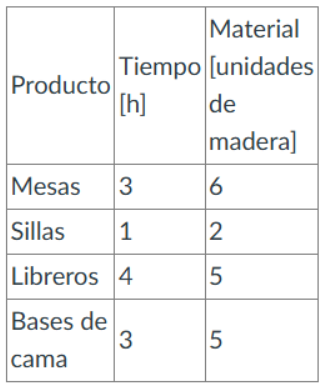

Las mesas se venden en 9000, las sillas en 3000, los libreros en 10000, y las bases de cama en 9000. Suponiendo una jornada de 40 horas a la semana y que tienen 100 unidades de madera, ¿qué les conviene construir durante una semana para maximizar su ganancia?

¿Cuántas horas trabaja cada quién? ¿Cuánto material se usa? ¿Cuál se el ingreso total si se vende todo lo fabricado?

1. Identificar criterio

Maximizar la ganancia total.

2. Variables de control

- m1 = Número de mesas fabricadas.
- s1 = Número de sillas fabricadas.
- l1 = Número de libreros fabricados.
- b1 = Número de bases de cama fabricadas.
- m2 = Número de mesas fabricadas.
- s2 = Número de sillas fabricadas.
- l2 = Número de libreros fabricados.
- b2 = Número de bases de cama fabricadas.


3. Función de costo

C = 9000m1 + 3000s1 + 10000l1 + 9000b1 + 9000m2 + 3000s2 + 10000l2 + 9000b2

4. Información adicional

-Tiempo que tarda el empleado experimentado: 

-Tiempo que tarda el aprendiz: 

-Cantidad de material:

5. Problema de optimización

C = 9000(m1+m1)+3000(s1+s2)+10000(l1+l2)+9000(b1+b2)

Restricciones:

  \[
  3m_1 + s_1 + 4l_1 + 3b_1 \leq 40
  \]

  \[
  4.5m_2 + 1.5s_2 + 6l_2 + 4.5b_2 \leq 40
  \]

  \[
  6(m_1 + m_2) + 2(s_1 + s_2) + 5(l_1 + l_2) + 5(b_1 + b_2) \leq 100
  \]

In [58]:
c = [-9000, -3000, -10000, -9000, -9000, -3000, -10000, -9000]  

A = [
    [3, 1, 4, 3, 0, 0, 0, 0], 
    [0, 0, 0, 0, 4.5, 1.5, 6, 4.5],  
    [6, 2, 5, 5, 6*1.2, 2*1.2, 5*1.2, 5*1.2] 
]

b = [40, 40, 100]  

opt.linprog(c, A, b,)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -178666.66666666663
              x: [ 0.000e+00  0.000e+00  4.000e+00  8.000e+00  0.000e+00
                   0.000e+00  6.667e+00  0.000e+00]
            nit: 3
          lower:  residual: [ 0.000e+00  0.000e+00  4.000e+00  8.000e+00
                              0.000e+00  0.000e+00  6.667e+00  0.000e+00]
                 marginals: [ 1.200e+03  4.000e+02  0.000e+00  0.000e+00
                              1.740e+03  5.800e+02  0.000e+00  3.000e+02]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e

2. La carpintería recibió una orden por 3 combos de mesa + 6 sillas.

¿Se puede cumplir la orden?
Si sí, ¿qué es lo que tienen que fabricar en el resto del tiempo y con el resto del material para maximizar su ganancia?
¿Cuántas horas trabaja cada quién?
¿Cuánto material se usa?
¿Cuál es el nuevo ingreso total?